In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
ls

'Colab Notebooks'/   ISblue_workshop/


In [ ]:
#!mkdir ISblue_workshop

In [ ]:
ls

'Colab Notebooks'/   ISblue_workshop/


In [ ]:
# Import necessary library for data construction and generation
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision import datasets,models,transforms
import matplotlib.pyplot as plt
import os
import time

In [ ]:
# check the GPU or cpu device is availble on your system
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# dataset path
pathtrain="/content/drive/MyDrive/ISblue_workshop/dataset/train"
pathval="/content/drive/MyDrive/ISblue_workshop/dataset/val"


In [ ]:
# Dataset step1
data_train=datasets.ImageFolder(pathtrain)
print(len(data_train))

328


In [ ]:
data_val=datasets.ImageFolder(pathval)
print(len(data_val))

66


In [ ]:
class_names = data_train.class_to_idx
print(class_names)

{'class1': 0, 'class2': 1, 'class3': 2}


In [ ]:
#check image and label from dataset
imge=data_train[0][0]

In [ ]:
label=data_train[0][1]
label

0

0


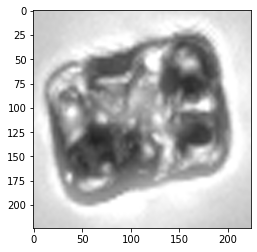

In [ ]:
# grab first sample from dataset
x,y=data_train[1]
plt.imshow(x)
print(y)

In [ ]:
# check all transforms available in pytorch module
from torchvision import transforms
dir(transforms)


['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

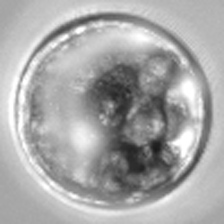

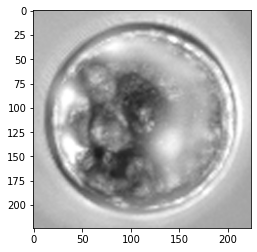

In [ ]:
# #check transformation images
# # torchvisions transoforms
# # define transform
from torchvision.transforms import ToTensor, RandomHorizontalFlip,CenterCrop,ToPILImage

from torchvision.transforms.functional import to_tensor,hflip, center_crop, to_pil_image

imge=data_train[0][0]
plt.imshow(imge)
# fliped version
hflip(imge)


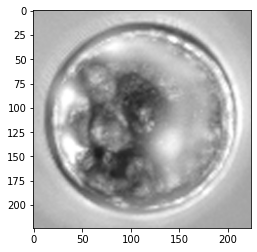

In [ ]:
transform=RandomHorizontalFlip(0.6)
timg=transform(imge)
plt.imshow(imge)

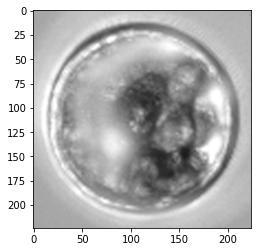

In [ ]:
plt.imshow(timg)

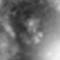

In [ ]:
center_crop(imge, output_size=(60,60))

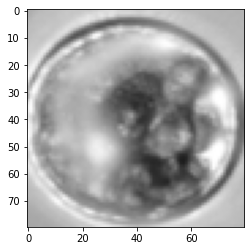

In [ ]:
# Data augmentation and normalization for training
transform_compe=transforms.Compose([transforms.RandomResizedCrop(80),
                                   transforms.RandomHorizontalFlip(),
                                   ])
tr_im=transform_compe(imge)
plt.imshow(tr_im)

In [ ]:
# Data augmentation and normalization for training
tran_transform=transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
                                   ])

In [ ]:
valid_transform=transforms.Compose([transforms.Resize(224),
                                   transforms.CenterCrop(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
                                   ])

In [ ]:
# dataset with augmentation or transformation
data_train_transoform=datasets.ImageFolder(pathtrain,transform=tran_transform)
print(len(data_train_transoform))

328


In [ ]:
data_val_trasnform=datasets.ImageFolder(pathval,transform=valid_transform)
print(len(data_val_trasnform))

66


In [ ]:
############ datalaoder use to convert dataset into bacthes
# Dataloader to convert dataset into batches(step2)
train_dataloader=torch.utils.data.DataLoader(data_train_transoform,batch_size=4,shuffle=True)
valid_dataloader=torch.utils.data.DataLoader(data_val_trasnform,batch_size=4)


In [ ]:
x,y=next(iter(train_dataloader)) 
print(x.shape)
print(y.shape)

torch.Size([4, 3, 224, 224])
torch.Size([4])


In [ ]:
# get a batch from training dataloader
inputs,classes=next(iter(train_dataloader))
img_batch=inputs.numpy()
img_batch=np.swapaxes(img_batch,3,1)
print(img_batch.shape)
print(img_batch.shape)
img_batch_classes=classes.numpy()
print(img_batch_classes)

(4, 224, 224, 3)
(4, 224, 224, 3)
[1 1 2 1]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


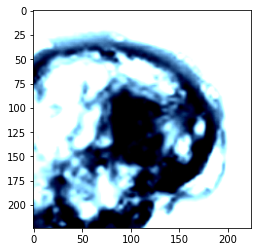

In [ ]:
img_batch_s1=img_batch[0,:,:,:]
plt.imshow(img_batch_s1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


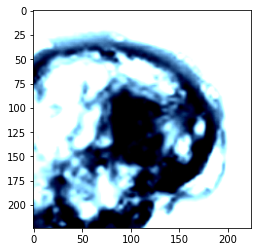

In [ ]:
img_batch_s1=img_batch[0,:,:,:]
plt.imshow(img_batch_s1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


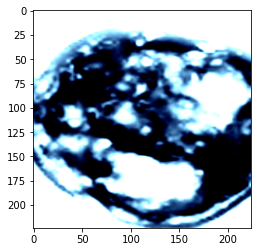

In [ ]:
img_batch_s2=img_batch[1,:,:,:]
plt.imshow(img_batch_s2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


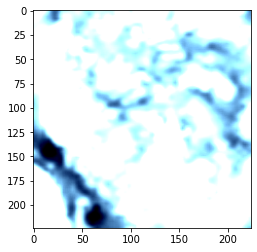

In [ ]:
img_batch_s4=img_batch[3,:,:,:]
plt.imshow(img_batch_s4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


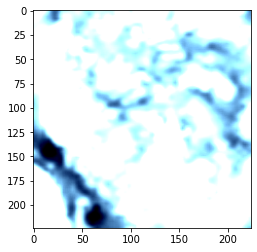

In [ ]:
img_batch_s1=img_batch[0,:,:,:]
plt.imshow(img_batch_s1)

img_batch_s1=img_batch[0,:,:,:]
plt.imshow(img_batch_s1)

img_batch_s2=img_batch[1,:,:,:]
plt.imshow(img_batch_s2)

img_batch_s3=img_batch[2,:,:,:]
plt.imshow(img_batch_s3)

img_batch_s4=img_batch[3,:,:,:]
plt.imshow(img_batch_s4)

Tere are 328 training samples
Tere are 66 testing samples
The selcted sample is [3, 224, 224] dimensional


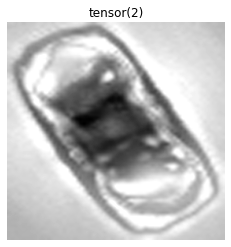

In [ ]:
# just for printing the sample from the dataset class
print("Tere are %d training samples"% len(data_train_transoform))
print("Tere are %d testing samples"% len(data_val_trasnform))
n=np.random.randint(len(data_val_trasnform))
x,y=data_val_trasnform[n] #can also check the image and labels
print('The selcted sample is %s dimensional'% list(x.size()))
plt.imshow(x[0],cmap='gray')
plt.axis('off')
plt.title(classes[y])
plt.show()


Tere are 328 training samples
Tere are 66 testing samples
The selcted sample is [3, 224, 224] dimensional


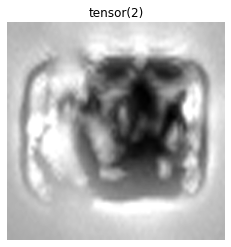

In [ ]:
# just for printing the sample from the dataset class
print("Tere are %d training samples"% len(data_train_transoform))
print("Tere are %d testing samples"% len(data_val_trasnform))
n=np.random.randint(len(data_val_trasnform))
x,y=data_val_trasnform[n] #can also check the image and labels
print('The selcted sample is %s dimensional'% list(x.size()))
plt.imshow(x[0],cmap='gray')
plt.axis('off')
plt.title(classes[y])
plt.show()


In [ ]:
########### Second method to prepare the dataset #######################
#%% multiclass classification using small animals dataset
#% 2D dataset spectrogram for image classification
import os
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torchvision.transforms as transforms
from torchvision import models
from tqdm import tqdm
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
#import Image
#from skimage import io
################## dataset class ############################


class Smallanimaldata(Dataset):
    def __init__(self,root,class_1,class_2,class_3,is_train):
        self.root=root
        self.class_1=class_1
        self.class_2=class_2
        self.class_3=class_3
        self.is_train = is_train
        #self.augment_pool = augment_pool()
        
        ######### dataset lists #################
        self.pathc=os.path.join(self.root,self.class_1)
        self.pathlistc=os.listdir(self.pathc)
        self.clas1=[]
        for lstcont in self.pathlistc:
            pathf=os.path.join(self.pathc,lstcont)
            self.clas1.append((pathf,0))
            
        self.pathc2=os.path.join(self.root,self.class_2)
        self.pathlistc2=os.listdir(self.pathc2)
        self.clas2=[]
        for lst2 in self.pathlistc2:
            pathfm=os.path.join(self.pathc2,lst2)
            self.clas2.append((pathfm,1))

        self.path3=os.path.join(self.root,self.class_3)
        self.pathlistc3=os.listdir(self.path3)
        self.clas3=[]
        for lst3 in self.pathlistc3:
            pathfm3=os.path.join(self.path3,lst3)
            self.clas3.append((pathfm3,2))
        # total list for class1 and class2
        self.totpath=self.clas1+self.clas2+self.clas3
        
    
        # for training
        if self.is_train:
            self.transform=transforms.Compose([transforms.ToPILImage(),
                                               transforms.Resize((224,224)),
                                               transforms.RandomHorizontalFlip(p=0.5),
                                               transforms.RandomVerticalFlip(p=.05),
                                               transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.01),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])
                ])
        # for validation
        if not self.is_train:
            self.transform=transforms.Compose([transforms.ToPILImage(),
                                               transforms.Resize((224,224)),
                                               transforms.ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                           std=[0.229, 0.224, 0.225])
                ])
            
            
    def __getitem__(self,idx):
        
        ################### Speech Dataset spectrum #################
        pathd,label=self.totpath[idx]
        #print(pathd)
        img=cv2.imread(pathd)
        img=self.transform(img)
        
        return {"im1":img,
                "labl1":label}
    
    
    def __len__(self):
        return len(self.totpath)
    

In [ ]:
train_data2="/content/drive/MyDrive/ISblue_workshop/dataset/train"    
valid_data2="/content/drive/MyDrive/ISblue_workshop/dataset/val"

dataset_train=Smallanimaldata(train_data2,'class1','class2','class3',True)
dataset_valid=Smallanimaldata(valid_data2,'class1','class2','class3',False)
len(dataset_train)
len(dataset_valid)

66

In [ ]:
data=dataset_train[0]
imgen=data['im1']
print(imgen.shape)
label=data['labl1']
print(label)

torch.Size([3, 224, 224])
0


In [ ]:
train_loader=DataLoader(dataset_train,batch_size=16,shuffle=True)
valid_loader=DataLoader(dataset_valid,batch_size=16,shuffle=False) 
print(len(train_loader.dataset))
print(len(valid_loader.dataset))

328
66


In [ ]:
for i,(data) in enumerate(train_loader):
  print(i)
  img,label=data['im1'],data['labl1']
  print(img.shape)
  print(label.shape)

0
torch.Size([16, 3, 224, 224])
torch.Size([16])
1
torch.Size([16, 3, 224, 224])
torch.Size([16])
2
torch.Size([16, 3, 224, 224])
torch.Size([16])
3
torch.Size([16, 3, 224, 224])
torch.Size([16])
4
torch.Size([16, 3, 224, 224])
torch.Size([16])
5
torch.Size([16, 3, 224, 224])
torch.Size([16])
6
torch.Size([16, 3, 224, 224])
torch.Size([16])
7
torch.Size([16, 3, 224, 224])
torch.Size([16])
8
torch.Size([16, 3, 224, 224])
torch.Size([16])
9
torch.Size([16, 3, 224, 224])
torch.Size([16])
10
torch.Size([16, 3, 224, 224])
torch.Size([16])
11
torch.Size([16, 3, 224, 224])
torch.Size([16])
12
torch.Size([16, 3, 224, 224])
torch.Size([16])
13
torch.Size([16, 3, 224, 224])
torch.Size([16])
14
torch.Size([16, 3, 224, 224])
torch.Size([16])
15
torch.Size([16, 3, 224, 224])
torch.Size([16])
16
torch.Size([16, 3, 224, 224])
torch.Size([16])
17
torch.Size([16, 3, 224, 224])
torch.Size([16])
18
torch.Size([16, 3, 224, 224])
torch.Size([16])
19
torch.Size([16, 3, 224, 224])
torch.Size([16])
20
torch.S